# **Perkenalan**

---
<b>MILESTONE PHASE 0</b>
<p>Nama  : Yasmine Naraindas Setiadi</p>
<p>Batch : 024</p>

---

# **Identifikasi Masalah**

### **A. Topik Permasalahan**

<p><b>Analisis Kepatuhan SLA pada Tiket Support untuk Meningkatkan Efisiensi dan Kualitas Layanan</b></p>

<p>Topik ini berfokus pada analisis persentase kepatuhan SLA (Service Level Agreement) untuk respons pertama dan penyelesaian tiket berdasarkan prioritas, grup agen, serta faktor-faktor lain yang berkontribusi pada pelanggaran SLA. Tujuan utama adalah mengidentifikasi area yang memerlukan perbaikan guna meningkatkan efisiensi tim support dan kepuasan pelanggan. Analisis dilakukan dengan menggunakan data tiket sepanjang tahun 2023.</p>

### **B. Latar Belakang**

<p>Dalam dunia Tim Support, Pelapor mengharapkan respons dan penyelesaian issue yang cepat. Oleh karena itu, SLA (Service Level Agreement) menjadi pedoman penting yang membantu Tim Support menjaga kualitas. SLA memastikan bahwa setiap masalah Pelapor ditangani dalam waktu yang telah disepakati.
<p>Namun, tidak semua tiket dapat diselesaikan sesuai SLA karena berbagai faktor, seperti kompleksitas masalah, tingkat prioritas tiket, atau ketersediaan Tim Support. Jika pelanggaran SLA sering terjadi, hal ini dapat berdampak pada kepercayaan Pelapor terhadap layanan yang diberikan.
<p>Oleh karena itu, penting untuk menganalisis sejauh mana Tim Support berhasil memenuhi SLA dan memahami faktor yang memengaruhi pelanggaran SLA. Dengan mengetahui penyebab utama, Perusahaan dapat mengoptimalkan proses kerja untuk memberikan layanan yang lebih baik.

### **C. Metode SMART**

<p>Penjelasan tentang masalah yang akan dianalisis, disusun dengan pendekatan SMART yang terdiri dari lima elemen: Specific (Spesifik), Measurable (Terukur), Achievable (Dapat Dicapai), Relevant (Relevan), Time-bound (Berbatas Waktu). Mari kita bahas setiap elemen tersebut dengan rinci dalam konteks analisis SLA pada tim support:.

<p><b>- Spesifik</b></p>
Menganalisis persentase tiket yang memenuhi SLA dan faktor-faktor yang menyebabkan pelanggaran SLA berdasarkan prioritas atau grup agen.
<p><b>- Terukur</b></p>
Mengukur persentase tiket yang memenuhi SLA untuk respons pertama (>80%) dan penyelesaian (>75%), serta mengidentifikasi kelompok tiket dengan pelanggaran SLA tertinggi.
<p><b>- Dapat Dicapai</b></p>
Melakukan analisis data menggunakan informasi SLA, prioritas tiket, grup agen, dan waktu penyelesaian dari dataset yang tersedia.
<p><b>- Relevan</b></p>
Hasil analisis membantu meningkatkan kecepatan, efisiensi kerja tim dukungan teknis, dan kepuasan pelanggan.
<p><b>- Berbatas Waktu</b></p>
<p>Analisis difokuskan pada data tiket selama Januari hingga Desember 2023 dan diselesaikan dalam waktu 1-2 minggu</p>

### **D. Penjabaran Masalah**

<p>1. Berapa Presentase Tiket yang memenuhi SLA untuk Respone pertama dan penyelesaian ?<p>
<p>2. Apa Faktor yang menyebabkan Pelanggaran SLA berdasarkan prioritas tiket ?<p>
<p>3. Kelompok Tiket mana yang memilikir Pelanggaran SLA tertinggi ?<p>
<p>4. Apakah ada korelasi antara Prioriras Tiket dan Waktu Penyesuaian ?<p>
<p>5. Grub Agen mana yang memiliki performa terbaik dalam memenuhi SLA ?<p>
<p>6. Apakah ada Perbedaan signifikan dalam kepatuhan SLA antara bulan bulan tertentu ?<p>


<p><b>Dataset : </b><a>https://www.kaggle.com/datasets/suvroo/technical-support-dataset</a></p>

# **Data Loading**

In [22]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

<p>Pada bagian ini, kita mengunduh dataset technical_support_dataset.csv dan memuatnya menggunakan Pandas. Dataset ini berisi informasi terkait tiket support yang dihadapi oleh tim teknis.</p>

In [21]:
# Mengunduh dataset dan memuatnya
data = pd.read_csv('technical_support_dataset.csv')

# Menampilkan semua kolom maksimal
pd.set_option('display.max_columns', None)

# Menampilkan data awal
data.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,First response time,SLA For first response,Resolution time,SLA For Resolution,Close time,Agent interactions,Survey results,Product group,Support Level,Country,Latitude,Longitude
0,Closed,1012,Low,Email,Feature request,1st line support,Kristos Westoll,2023-01-02 00:58:36,2023-01-04 00:58:36,2023-01-02 01:58:36,2023-01-02 01:03:17.432,Within SLA,2023-01-04 00:31:51.694,Within SLA,2023-01-04 04:02:59.013,1.0,3.0,Custom software development,Tier 1,Republic of Ireland,53.094024,-8.019675
1,In progress,1013,High,Phone,Product setup,2nd line support,Adolpho Messingham,2023-01-02 07:27:25,2023-01-04 07:27:25,2023-01-02 07:29:25,2023-01-02 07:27:43.231,Within SLA,NaN,SLA Violated,NaN,3.0,NaN,Other,Tier 2,Italy,43.036776,12.678565
2,Resolved,1014,Low,Chat,Purchasing and invoicing,1st line support,Bernard Beckley,2023-01-02 06:59:04,2023-01-03 06:59:04,2023-01-02 07:01:04,2023-01-02 06:59:57.471,Within SLA,2023-01-02 22:45:32.974,Within SLA,NaN,2.0,NaN,Custom software development,Tier 1,Austria,47.696472,13.345735
3,Closed,1015,Medium,Email,Pricing and licensing,1st line support,Connor Danielovitch,2023-01-03 03:09:39,2023-01-05 03:09:39,2023-01-03 04:09:39,2023-01-03 07:09:15.835,SLA Violated,2023-01-04 14:32:34.979,Within SLA,2023-01-08 04:24:54.771,10.0,4.0,Ready to use Software,Tier 1,Spain,39.673370,-4.767726
4,Closed,1016,Low,Email,Product setup,1st line support,Kristos Westoll,2023-01-03 00:03:58,2023-01-05 00:03:58,2023-01-03 01:03:58,2023-01-03 00:08:01.684,Within SLA,2023-01-04 12:03:05.986,Within SLA,2023-01-06 06:05:08.637,1.0,2.0,Other,Tier 1,Austria,47.696472,13.345735


<p><b>Terkait detail dataset</b></p>
<p>Dataset ini berisi catatan rinci tentang tiket dukungan pelanggan, memberikan gambaran mendalam mengenai kinerja dan efisiensi tim dukungan teknis. Setiap catatan merepresentasikan interaksi dukungan yang unik, mencakup berbagai atribut seperti status, proses penanganan, dan resolusi tiket. Bidang utama dalam dataset ini meliputi tingkat urgensi tiket, keterlibatan agen, saluran dukungan, serta kepatuhan terhadap Perjanjian Tingkat Layanan (SLA), memungkinkan analisis terperinci terhadap kinerja layanan pelanggan.</p>

<p>Beberapa informasi penting yang dapat dianalisis mencakup tren jumlah tiket, waktu respons, waktu penyelesaian pertama, kinerja agen, dan tingkat kepuasan pelanggan. Selain itu, data geografis seperti negara asal dan koordinat (lintang, bujur) memungkinkan analisis distribusi tiket berdasarkan wilayah. Dataset ini berfungsi sebagai sumber informasi yang lengkap untuk mengevaluasi aspek-aspek utama dalam kinerja pusat dukungan teknis.</p>

- <b>Status :</b> Status tiket dalam jalur dukungan (Open: tiket baru menunggu pemrosesan, In Progress: sedang ditangani oleh agen, Resolved: solusi disediakan, Closed: tiket dikonfirmasi ditutup oleh pelanggan).
- <b>Ticket ID	:</b> Nomor identifikasi tiket unik.
- <b>Priority	:</b> Urgensi tiket (low, medium, high).
- <b>Source	:</b> Saluran yang digunakan untuk mengajukan permintaan (obrolan, telepon, email).
- <b>Topic	    :</b> Pokok bahasan pertanyaan pelanggan.
- <b>Agent Group	:</b> Kelompok produk yang terkait dengan permintaan pelanggan.
- <b>Agent Name	:</b> Nama agen yang saat ini menangani tiket.
- <b>Created time	   :</b> Cap waktu yang menunjukkan saat tiket diterima.
- <b>Expected SLA to resolve	:</b> Batas waktu penyelesaian tiket.
- <b>Expected SLA to first response	:</b> Batas waktu untuk memberikan tanggapan awal.
- <b>First response time	:</b> Cap waktu saat respons awal diberikan.
- <b>SLA For first response	:</b> Status kepatuhan respons pertama (Within SLA, SLA Violated).
- <b>Resolution time	:</b> Stempel waktu saat tiket diselesaikan.
- <b>SLA For Resolution	:</b> Status kepatuhan resolusi (Within SLA, SLA Violated).
- <b>Close time		:</b> Stempel waktu saat tiket ditutup.
- <b>Agent interactions	:</b> Jumlah total interaksi agen per tiket.
- <b>Survey results	:</b> Skor kepuasan pelanggan pada skala 1 sampai 5.
- <b>Product group	:</b> Kelompok produk yang terkait dengan permintaan pelanggan.
- <b>Support Level	:</b> Tingkat kesulitan tiket (Tier 1, Tier 2).
- <b>Country	:</b> Negara asal pelanggan yang membuat tiket.
- <b>Latitude	:</b> Latitude coordinates of the customer’s country.
- <b>Longitude :</b> Longitude coordinates of the customer’s country.

# **Data Cleaning**

Setelah memuat data, kita bisa mengeksplorasi dan membersihkan data lebih lanjut (misalnya menghapus nilai yang hilang atau menangani format tanggal yang tidak konsisten).

In [3]:
# Melakukan pengecekan type data dan lain apakah ada data yang tidak sama terlebih dahulu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          2330 non-null   object 
 1   Ticket ID                       2330 non-null   int64  
 2   Priority                        2330 non-null   object 
 3   Source                          2330 non-null   object 
 4   Topic                           2330 non-null   object 
 5   Agent Group                     2330 non-null   object 
 6   Agent Name                      2330 non-null   object 
 7   Created time                    2330 non-null   object 
 8   Expected SLA to resolve         2330 non-null   object 
 9   Expected SLA to first response  2330 non-null   object 
 10  First response time             2312 non-null   object 
 11  SLA For first response          2330 non-null   object 
 12  Resolution time                 19

In [4]:
# Mengecek missing values
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Status                               0
Ticket ID                            0
Priority                             0
Source                               0
Topic                                0
Agent Group                          0
Agent Name                           0
Created time                         0
Expected SLA to resolve              0
Expected SLA to first response       0
First response time                 18
SLA For first response               0
Resolution time                    418
SLA For Resolution                   0
Close time                        1157
Agent interactions                  18
Survey results                    1157
Product group                        0
Support Level                        0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64


<p><b>Analisis:</b></p>
<p>Mengidentifikasi apakah ada missing values dalam dataset yang dapat mempengaruhi analisis selanjutnya. Missing values perlu diatasi karena jika tidak, hasil analisis bisa menjadi tidak akurat.</p>

<p>Dengan kode ini, kita memverifikasi apakah setiap kolom memiliki data yang lengkap atau jika ada nilai yang hilang. Informasi ini akan membantu kita memilih metode penanganan yang tepat untuk missing values, apakah dengan menghapus baris, mengimputasi nilai, atau cara lainnya.</p>

<p><b>Hasil yang Diharapkan:</b></p>
<p>Output yang diharapkan adalah jumlah missing values untuk setiap kolom. Jika ada kolom yang memiliki missing values, kita akan melihat hasil yang menunjukkan jumlah nilai yang hilang pada kolom tersebut.</p>

In [5]:
# Menghapus beberapa kolom yang tidak di gunakan
data.drop(columns=['Country','Latitude','Longitude'],inplace=True)

In [6]:
# Konversi format kolom jika diperlukan (contoh: waktu)
data['Created time'] = pd.to_datetime(data['Created time'])
data['Resolution time'] = pd.to_datetime(data['Resolution time'])

<p><b>Penjelasan:</b></p>
<p>Mengonversi kolom tanggal menjadi format datetime agar analisis terkait waktu bisa dilakukan dengan benar, seperti menghitung durasi atau menganalisis data berdasarkan periode tertentu.</p>
<p>Setelah konversi, kita dapat lebih mudah bekerja dengan data waktu dan menjalankan analisis seperti menghitung selisih waktu atau memfilter data berdasarkan tanggal tertentu.</p>
<p><b>Hasil yang Diharapkan:</b></p>
<p>Dataset akan memiliki kolom 'Created Date' dan 'Resolved Date' yang dalam format datetime yang memungkinkan operasi waktu yang lebih akurat, seperti menghitung waktu penyelesaian tiket atau memvisualisasikan data berdasarkan waktu.</p>

In [7]:
# Menambahkan kolom waktu penyelesaian
data['Resolution Time (Days)'] = (data['Resolution time'] - data['Created time']).dt.days

<p><b>Penjelasan:</b></p>
<p>Menghitung waktu penyelesaian setiap tiket, yang penting untuk analisis SLA (Service Level Agreement).</p>
<p>Kolom 'Resolution Time (Days)' akan memberi kita informasi penting tentang berapa lama tiket diambil untuk diselesaikan, yang dapat digunakan untuk menganalisis apakah SLA tercapai atau tidak.</p>

In [8]:
# Menentukan SLA berdasarkan prioritas
def check_sla(row):
    if row['Resolution Time (Days)'] == -1:
        return 0  # Jika waktu penyelesaian tidak ada (masih kosong), SLA tidak terpenuhi
    elif row['Priority'] == 'High':
        return 1 if row['Resolution Time (Days)'] <= 2 else 0
    else:
        return 1 if row['Resolution Time (Days)'] <= 5 else 0

<p><b>Penjelasan:</b></p>
<p>Menandai tiket yang memenuhi atau tidak memenuhi SLA berdasarkan prioritas dan waktu penyelesaian.</p>
<p>Dengan menambahkan kolom 'SLA Met', kita dapat dengan mudah menganalisis seberapa baik tim support dalam memenuhi SLA dan apakah ada masalah dalam memenuhi SLA untuk tiket prioritas tertentu.</p>


In [9]:
# Menerapkan SLA pada setiap baris data
data['SLA Met'] = data.apply(check_sla, axis=1)

<p><b>Penjelasan:</b></p>
<p>Kolom 'SLA Met' akan berisi nilai 1 untuk tiket yang memenuhi SLA dan 0 untuk yang tidak. Data ini dapat digunakan untuk menghitung persentase tiket yang memenuhi SLA dan untuk menganalisis faktor-faktor yang mempengaruhi pelanggaran SLA.</p>


In [10]:
data.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,First response time,SLA For first response,Resolution time,SLA For Resolution,Close time,Agent interactions,Survey results,Product group,Support Level,Resolution Time (Days),SLA Met
0,Closed,1012,Low,Email,Feature request,1st line support,Kristos Westoll,2023-01-02 00:58:36,2023-01-04 00:58:36,2023-01-02 01:58:36,2023-01-02 01:03:17.432,Within SLA,2023-01-04 00:31:51.694,Within SLA,2023-01-04 04:02:59.013,1.0,3.0,Custom software development,Tier 1,1.0,1
1,In progress,1013,High,Phone,Product setup,2nd line support,Adolpho Messingham,2023-01-02 07:27:25,2023-01-04 07:27:25,2023-01-02 07:29:25,2023-01-02 07:27:43.231,Within SLA,NaT,SLA Violated,NaN,3.0,NaN,Other,Tier 2,NaN,0
2,Resolved,1014,Low,Chat,Purchasing and invoicing,1st line support,Bernard Beckley,2023-01-02 06:59:04,2023-01-03 06:59:04,2023-01-02 07:01:04,2023-01-02 06:59:57.471,Within SLA,2023-01-02 22:45:32.974,Within SLA,NaN,2.0,NaN,Custom software development,Tier 1,0.0,1
3,Closed,1015,Medium,Email,Pricing and licensing,1st line support,Connor Danielovitch,2023-01-03 03:09:39,2023-01-05 03:09:39,2023-01-03 04:09:39,2023-01-03 07:09:15.835,SLA Violated,2023-01-04 14:32:34.979,Within SLA,2023-01-08 04:24:54.771,10.0,4.0,Ready to use Software,Tier 1,1.0,1
4,Closed,1016,Low,Email,Product setup,1st line support,Kristos Westoll,2023-01-03 00:03:58,2023-01-05 00:03:58,2023-01-03 01:03:58,2023-01-03 00:08:01.684,Within SLA,2023-01-04 12:03:05.986,Within SLA,2023-01-06 06:05:08.637,1.0,2.0,Other,Tier 1,1.0,1


In [11]:
data.to_csv('technical_support_dataset_clean.csv')

<p><b>Analisi dari Data Cleaning</b></p>
<p>Bagian Data Cleaning ini untuk memastikan bahwa data yang digunakan untuk analisis bersih, konsisten, dan dalam format yang sesuai. Langkah-langkah yang dilakukan meliputi pengecekan missing values, konversi format tanggal, penghitungan waktu penyelesaian tiket, dan penentuan apakah tiket memenuhi SLA atau tidak. Semua langkah ini adalah dasar penting untuk melanjutkan analisis SLA dan performa tim support.<p>

# **Analisis dan perhitungan**

### **1. Persentase Tiket yang Memenuhi SLA**

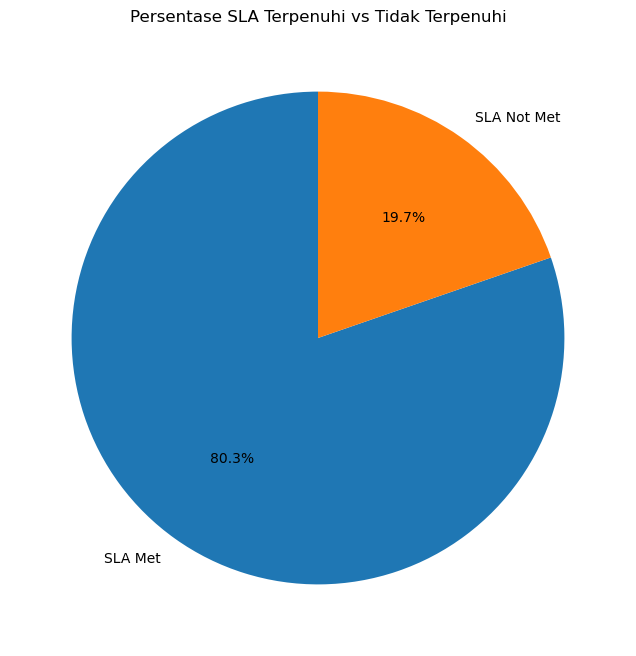

In [12]:
# Penjabaran Masalah 1: Persentase Tiket yang Memenuhi SLA
sla_met_percentage = data['SLA Met'].mean() * 100
sla_not_met_percentage = 100 - sla_met_percentage

# Membuat pie chart
plt.figure(figsize=(8, 8))
labels = ['SLA Met', 'SLA Not Met']
sizes = [sla_met_percentage, sla_not_met_percentage]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) 
plt.title("Persentase SLA Terpenuhi vs Tidak Terpenuhi")
plt.show()

<p><b>Penjelasan:</b></p>
<b>SLA Met > 80%:</b>
<p>- Tim memiliki performa yang baik dalam memenuhi SLA.</p>
<p>- Fokus bisa diarahkan untuk meningkatkan efisiensi pada kasus tertentu yang masih gagal memenuhi SLA.</p>

<b>SLA Met < 80%:</b>
<p>Ada peluang perbaikan, seperti:</p>
<p>- Meningkatkan kecepatan respons atau penyelesaian tiket.</p>
<p>- Menganalisis penyebab utama kegagalan memenuhi SLA.</p>

### **2. Pelanggaran SLA berdasarkan prioritas**

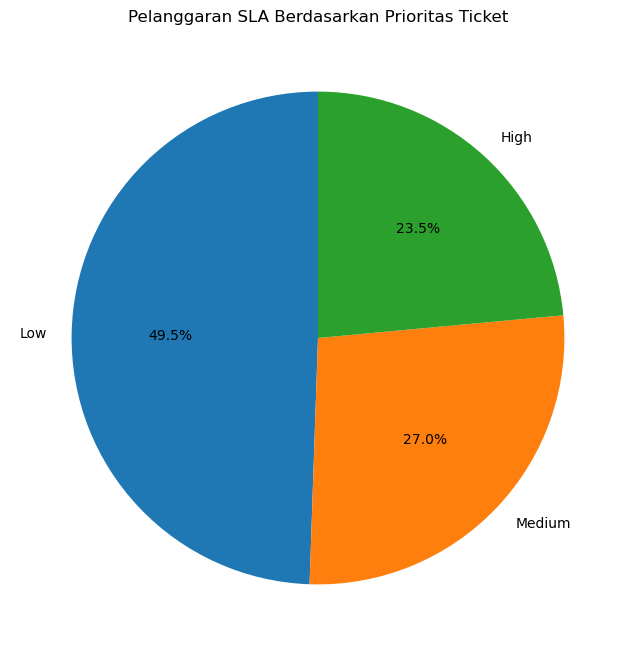

In [13]:
# Menghitung jumlah pelanggaran SLA berdasarkan prioritas
violations_by_priority = data[data['SLA Met'] == 0]['Priority'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(violations_by_priority, labels=violations_by_priority.index, autopct='%1.1f%%', startangle=90)
plt.title("Pelanggaran SLA Berdasarkan Prioritas Ticket")
plt.show()

<p><b>Penjelasan:</b></p>
<p>- Pelanggaran SLA paling banyak terjadi pada tiket dengan prioritas rendah (49,5%), yang menunjukkan bahwa tiket ini sering kali tidak segera ditangani meskipun 
seharusnya lebih fleksibel dalam waktu penyelesaiannya. </p>
<p>- Tiket dengan prioritas menengah (27%) juga menunjukkan pelanggaran, meskipun jumlahnya lebih sedikit, yang bisa jadi disebabkan oleh kurangnya perhatian untuk menangani 
tiket tersebut. </p>
<p>- Pelanggaran pada tiket prioritas tinggi (23,5%) lebih sedikit, namun masih terjadi, mungkin karena masalah yang lebih kompleks atau ketergantungan pada tim lain.</p>

### **3. Kelompok Tiket dengan Pelanggaran SLA Tertinggi**

Kelompok dengan pelanggaran SLA tertinggi:
Product group
Ready to use Software               178
Custom software development         143
Other                                78
Training and Consulting Services     60
Name: SLA Met, dtype: int64


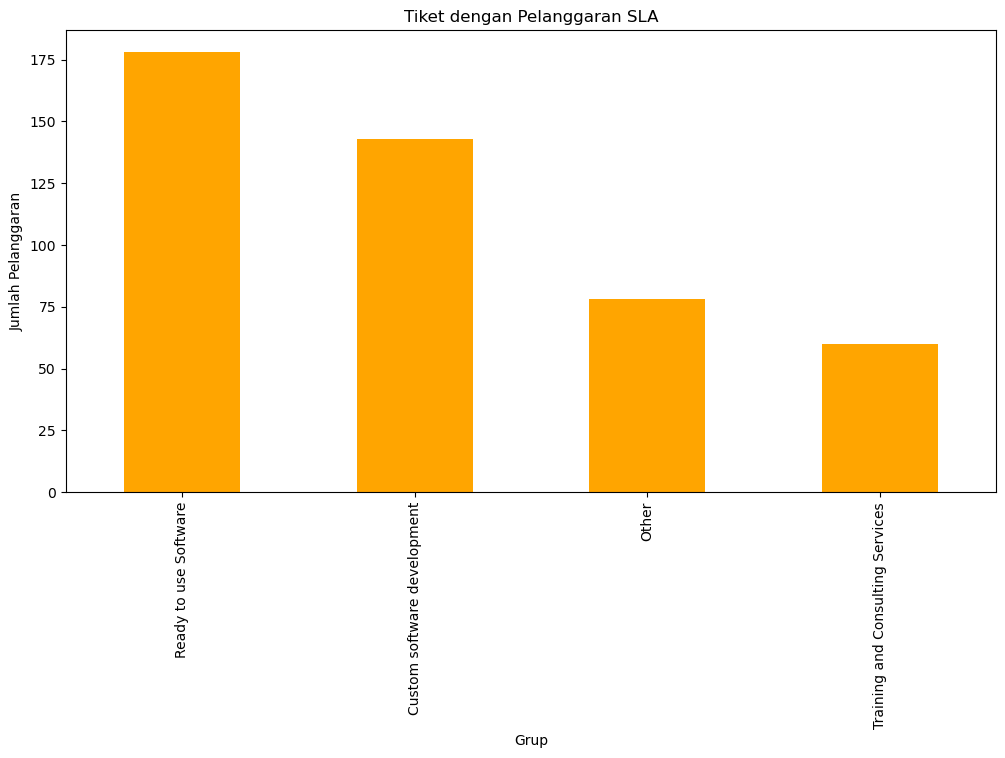

In [14]:
# Penjabaran Masalah 3: Kelompok Tiket dengan Pelanggaran SLA Tertinggi
group_violations = data[data['SLA Met'] == 0].groupby('Product group')['SLA Met'].count().sort_values(ascending=False)
print("Kelompok dengan pelanggaran SLA tertinggi:")
print(group_violations.head())

plt.figure(figsize=(12, 6))
group_violations.head().plot(kind='bar', color='orange')
plt.title("Tiket dengan Pelanggaran SLA")
plt.xlabel("Grup")
plt.ylabel("Jumlah Pelanggaran")
plt.show()

<p><b>Penjelasan:</b></p>
<p>Kelompok produk dengan pelanggaran SLA tertinggi adalah Ready to use Software (178 pelanggaran) dan Custom Software Development (143 pelanggaran). Ini menunjukkan bahwa tiket untuk produk ini sering terlambat diselesaikan.</p>
<p>Kelompok lain seperti Other (78 pelanggaran) dan Training and Consulting Services (60 pelanggaran) juga mengalami pelanggaran, meskipun jumlahnya lebih rendah.</p>

### **4. Korelasi antara Prioritas Tiket dan Waktu Penyelesaian**

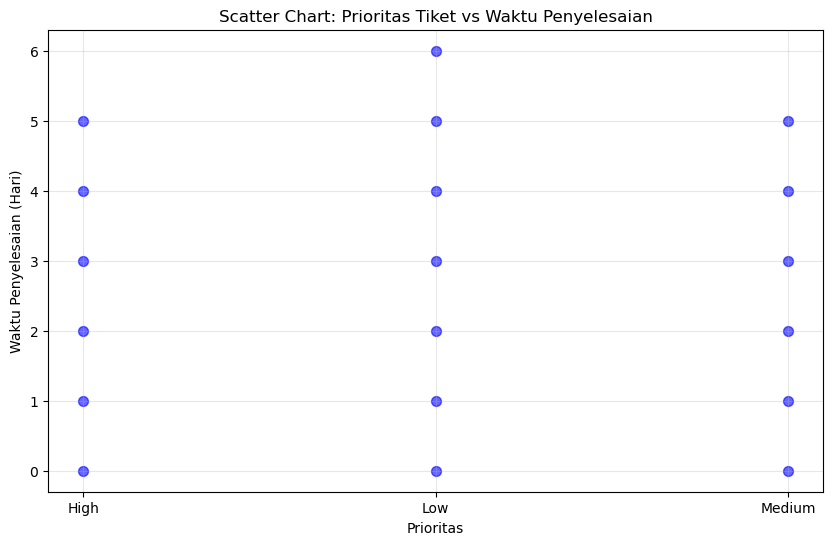

In [15]:
# Menyiapkan data untuk Scatter Chart
scatter_data = data.groupby(['Priority', 'Resolution Time (Days)']).size().reset_index(name='Count')

# Membuat Scatter Chart
plt.figure(figsize=(10, 6))

# Menampilkan setiap titik pada scatter chart
for i in range(len(scatter_data)):
    plt.scatter(
        x=scatter_data['Priority'][i],
        y=scatter_data['Resolution Time (Days)'][i],
        s=50,  # Ukuran titik tetap
        alpha=0.6,
        label=scatter_data['Priority'][i] if i == 0 else "",  # Label hanya untuk prioritas pertama
        color='blue'
    )

plt.title("Scatter Chart: Prioritas Tiket vs Waktu Penyelesaian")
plt.xlabel("Prioritas")
plt.ylabel("Waktu Penyelesaian (Hari)")
plt.grid(alpha=0.3)
plt.show()


<p><b>Penjelasan:</b></p>
<p>Bubble Chart menunjukkan hubungan antara prioritas tiket dan waktu penyelesaian.</p>
<p>Tiket dengan prioritas tinggi memiliki waktu penyelesaian yang lebih singkat, dengan banyak tiket yang diselesaikan dalam 0-1 hari. </p>
<p>Tiket prioritas rendah memiliki distribusi waktu penyelesaian yang lebih beragam, dengan beberapa tiket diselesaikan dalam 5 hari atau lebih.</p>

### **5. Grup Agen dengan Performa Terbaik dalam Memenuhi SLA**

Group Agent Performa:
Agent Group
2nd line support    0.810714
1st line support    0.800565
Name: SLA Met, dtype: float64


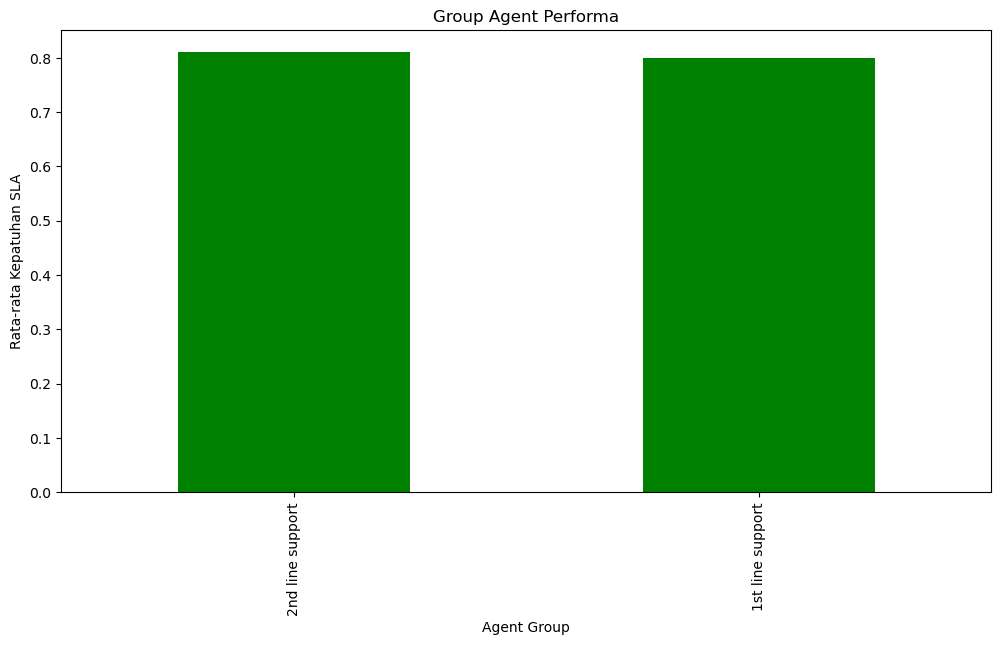

In [16]:
# Penjabaran Masalah 5: Grup Agen dengan Performa Terbaik dalam Memenuhi SLA
group_performance = data.groupby('Agent Group')['SLA Met'].mean().sort_values(ascending=False)
print("Group Agent Performa:")
print(group_performance.head())

plt.figure(figsize=(12, 6))
group_performance.head().plot(kind='bar', color='green')
plt.title("Group Agent Performa")
plt.ylabel("Rata-rata Kepatuhan SLA")
plt.show()

<p><b>Penjelasan:</b></p>
<p>Tim 2nd line support memiliki kepatuhan SLA terbaik, yaitu 81,07%, menandakan bahwa sebagian besar tiket diselesaikan tepat waktu. </p>
<p>Sementara tim 1st line support juga menunjukkan kinerja baik dengan kepatuhan SLA 80,05%. </p>
<p>Kedua tim ini menunjukkan performa yang sangat baik dalam memenuhi SLA dibandingkan grup lainnya.</p>

### **6. Persentase Over SLA Berdasarkan Bulan**

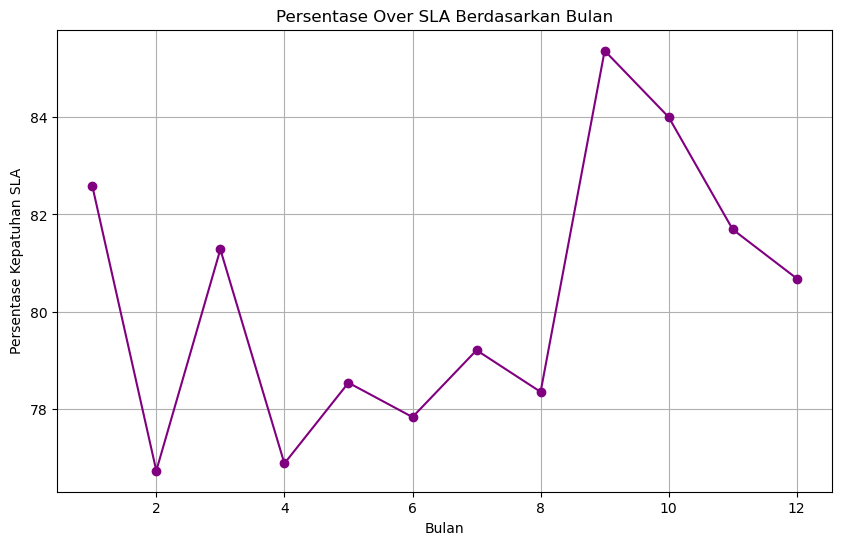

In [17]:
# Penjabaran Masalah 6: Persentase Over SLA Berdasarkan Bulan
# Menambahkan kolom bulan
data['Month'] = data['Created time'].dt.month

monthly_sla = data.groupby('Month')['SLA Met'].mean() * 100
plt.figure(figsize=(10, 6))
monthly_sla.plot(kind='line', marker='o', color='purple')
plt.title("Persentase Over SLA Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Persentase Kepatuhan SLA")
plt.grid()
plt.show()

<p><b>Penjelasan:</b></p>
<p>Persentase kepatuhan SLA bervariasi setiap bulannya. Bulan September (85,37%) dan Oktober (84,00%) mencatatkan persentase kepatuhan SLA tertinggi, 
sementara bulan Februari (76,73%) dan April (76,88%) memiliki persentase terendah. Secara keseluruhan, tingkat kepatuhan SLA cukup stabil sepanjang tahun, 
dengan sedikit penurunan di beberapa bulan tertentu.
</p>

### **Statistik Inferensial**

<p>Menggunakan chi2_contingency dari scipy.stats untuk menguji apakah ada hubungan signifikan antara prioritas tiket dan pemenuhan SLA. Dengan menggunakan Uji Chi-Square, kita dapat menentukan apakah distribusi tiket yang memenuhi SLA berbeda secara signifikan antara prioritas yang berbeda.</p>
<p><b>Hipotesis:</b></p>
<p>H0: Terdapat hubungan signifikan antara prioritas tiket dan pemenuhan SLA
<p>H1: Tidak terdapat hubungan signifikan antara prioritas tiket dan pemenuhan SLA


In [18]:
# Membuat tabel kontingensi antara Priority dan SLA Met
contingency_table = pd.crosstab(data['Priority'], data['SLA Met'])

# Uji Chi-Square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil
print(f"Chi-Square Test - Chi2 Statistik: {chi2_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Hasil: Terdapat hubungan signifikan antara prioritas tiket dan pemenuhan SLA.")
else:
    print("Hasil: Tidak terdapat hubungan signifikan antara prioritas tiket dan pemenuhan SLA.")


Chi-Square Test - Chi2 Statistik: 13.55, P-value: 0.0011
Hasil: Terdapat hubungan signifikan antara prioritas tiket dan pemenuhan SLA.


In [19]:
import seaborn as sns

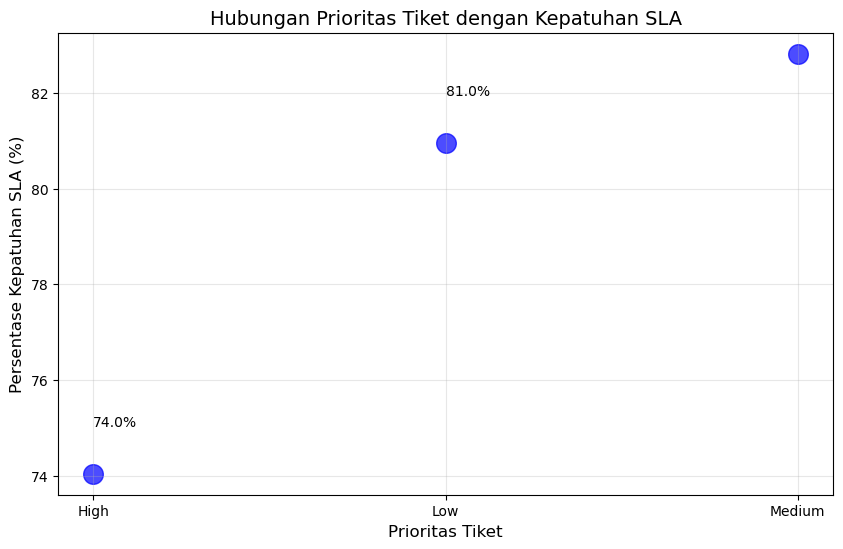

In [20]:
# Menyiapkan data untuk scatter plot
scatter_data = data.groupby('Priority')['SLA Met'].mean().reset_index()
scatter_data['SLA Met (%)'] = scatter_data['SLA Met'] * 100

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    scatter_data['Priority'], 
    scatter_data['SLA Met (%)'], 
    color='blue', 
    s=200, 
    alpha=0.7
)

# Menambahkan detail pada scatter plot
plt.title("Hubungan Prioritas Tiket dengan Kepatuhan SLA", fontsize=14)
plt.xlabel("Prioritas Tiket", fontsize=12)
plt.ylabel("Persentase Kepatuhan SLA (%)", fontsize=12)
plt.grid(alpha=0.3)
for i, txt in enumerate(scatter_data['SLA Met (%)']):
    plt.annotate(f'{txt:.1f}%', (scatter_data['Priority'][i], scatter_data['SLA Met (%)'][i] + 1))

plt.show()

<p>Berdasarkan hasil Uji Chi-Square, jika p-value < 0.05, maka kita bisa menyatakan bahwa ada hubungan signifikan antara prioritas tiket dan pemenuhan SLA. atau Jika p-value > 0.05, berarti tidak ada hubungan yang signifikan.</p>

<p><b>Hasil untuk dataset ini:</b></p>
<p>Chi2 Statistik: 13.55</p>
<P>p-value: 0.0011</p>
<p>Kesimpulan: P-value yang kecil (<0.05) <b>menunjukkan bahwa ada hubungan signifikan antara prioritas tiket dan kepatuhan SLA.</b></p>
<p>Dan dari hasilnya kita menyarankan untuk lebih memperhatikan grup agen dengan performa rendah atau tiket dengan prioritas rendah untuk meningkatkan SLA secara keseluruhan.</p>

# **6. Pengambilan Kesimpulan**

<p>Analisis ini bertujuan untuk mengevaluasi kepatuhan SLA (Service Level Agreement) dalam tiket dukungan teknis dan bagaimana faktor-faktor seperti prioritas tiket, grup agen, dan bulan dapat memengaruhi kepatuhan tersebut. Berikut adalah penjelasan dan hasil dari analisis yang dilakukan:</p>

<p><b>Persentase Tiket yang Memenuhi SLA, </b> Berdasarkan grafik pie chart, dapat dilihat persentase tiket yang memenuhi SLA. Jika SLA yang dipenuhi lebih dari 80%, maka tim sudah memiliki performa yang baik, tetapi perlu ada fokus pada perbaikan untuk tiket-tiket tertentu yang gagal memenuhi SLA.</p>

<p><b>Pelanggaran SLA Berdasarkan Prioritas, </b> Pelanggaran SLA paling banyak terjadi pada tiket dengan prioritas rendah, dan tiket prioritas tinggi juga mengalami pelanggaran meskipun dalam jumlah lebih kecil. Ini menunjukkan bahwa perhatian khusus perlu diberikan pada tiket prioritas rendah meskipun lebih fleksibel dalam waktu penyelesaiannya.</p>

<p><b>Kelompok Tiket dengan Pelanggaran SLA Tertinggi, </b> Kelompok produk "Ready to use Software" dan "Custom Software Development" mengalami pelanggaran SLA tertinggi, yang menunjukkan bahwa tiket pada produk ini sering terlambat diselesaikan.</p>

<p><b>Korelasi antara Prioritas Tiket dan Waktu Penyelesaian, </b> Scatter chart menunjukkan bahwa tiket dengan prioritas tinggi diselesaikan lebih cepat, sementara tiket prioritas rendah memiliki waktu penyelesaian yang lebih bervariasi. Hal ini mengindikasikan bahwa tim berusaha untuk menyelesaikan tiket dengan prioritas tinggi dengan lebih cepat.</p>

<p><b>Grup Agen dengan Performa Terbaik dalam Memenuhi SLA, </b> Grup agen "2nd Line Support" memiliki performa terbaik dalam memenuhi SLA, dengan kepatuhan mencapai lebih dari 80%, diikuti oleh grup "1st Line Support" yang juga memiliki kepatuhan SLA yang baik.</p>

<p><b>Persentase Over SLA Berdasarkan Bulan, </b> Analisis bulanan menunjukkan bahwa ada fluktuasi dalam kepatuhan SLA setiap bulan. Beberapa bulan, seperti September dan Oktober, mencatatkan kepatuhan SLA yang tinggi, sementara bulan Februari dan April mencatatkan persentase terendah. Hal ini menunjukkan pentingnya evaluasi bulanan untuk memahami tren dalam kepatuhan SLA.</p>

<p> </p>
<p><b>Rekomendasi</b></p>

<p>Untuk meningkatkan kepatuhan SLA, perlu adanya fokus pada tiket dengan prioritas rendah, serta peningkatan efisiensi pada kelompok produk dengan pelanggaran SLA tertinggi.
Tim juga perlu menganalisis lebih lanjut bulan-bulan dengan penurunan kepatuhan SLA untuk mengidentifikasi penyebab dan merumuskan solusi.</p>

### **LINK Tableau**

<a>https://public.tableau.com/views/Milestone1_17345206744000/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link</a>